In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    r'C:\Users\user\Desktop\aubergine dataset\train',
    target_size=(224, 224),  # VGG16 input size
    batch_size=32,
    class_mode='categorical'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(
       r'C:\Users\user\Desktop\aubergine dataset\test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 830 images belonging to 4 classes.
Found 490 images belonging to 4 classes.


In [19]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4, activation='softmax')(x)

model = Model(base_model.input, x)

In [20]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32,
    epochs=10  # You can adjust the number of epochs
)


Epoch 1/10
25/25 [==============================] - 291s 12s/step - loss: 0.7973 - accuracy: 0.6792 - val_loss: 0.1769 - val_accuracy: 0.9500
Epoch 2/10
25/25 [==============================] - 281s 11s/step - loss: 0.1803 - accuracy: 0.9424 - val_loss: 0.0484 - val_accuracy: 0.9917
Epoch 3/10
25/25 [==============================] - 298s 12s/step - loss: 0.0843 - accuracy: 0.9812 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 4/10
25/25 [==============================] - 304s 12s/step - loss: 0.0519 - accuracy: 0.9887 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 5/10
25/25 [==============================] - 309s 13s/step - loss: 0.0277 - accuracy: 0.9962 - val_loss: 0.0141 - val_accuracy: 1.0000
Epoch 6/10
25/25 [==============================] - 310s 13s/step - loss: 0.0235 - accuracy: 0.9987 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 7/10
25/25 [==============================] - 1995s 83s/step - loss: 0.0139 - accuracy: 0.9987 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch

16/16 [==============================] - 69s 4s/step - loss: 0.0031 - accuracy: 1.0000
Validation Loss: 0.0031
Validation Accuracy: 100.00%


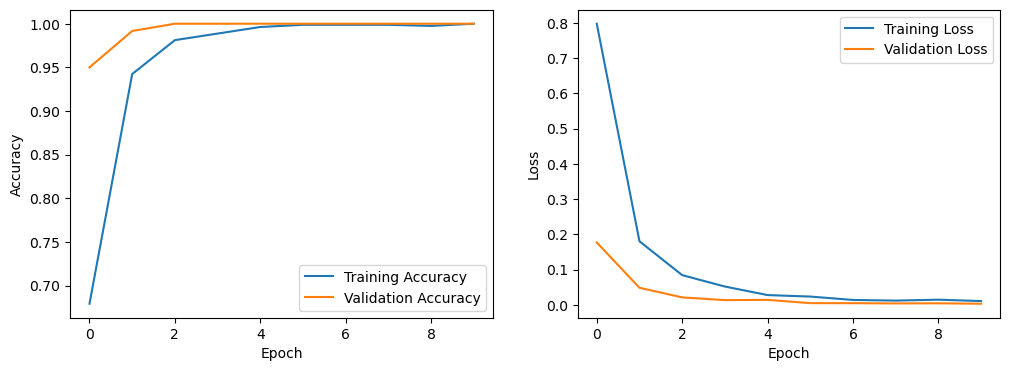

In [38]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy*100:.2f}%")
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s 143ms/step


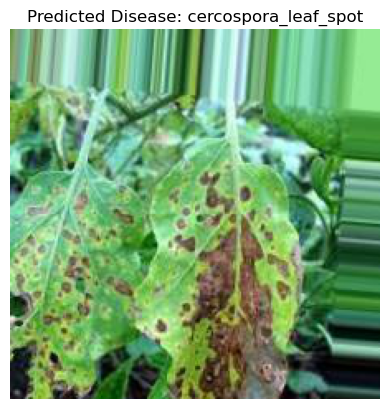

In [45]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load an image for prediction
image_path = r'C:\Users\user\Desktop\cer.jpeg'  # Replace with the path to your image
img = image.load_img(image_path, target_size=(224, 224))  # VGG16 input size

# Preprocess the image for prediction
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the pixel values

# Make predictions using the trained model
predictions = model.predict(img_array)

# Get class labels
class_labels = ['Phytophthora_blight', 'anthracnose_fruit_rot', 'cercospora_leaf_spot', 'phomopsis_fruit_rot']  # Replace with your actual class labels

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

# Display the image with the predicted class label
plt.imshow(img)
plt.title(f"Predicted Disease: {predicted_class_label}")
plt.axis('off')
plt.show()
